In [1]:
import csv
f1=open('data/LOCAL_PEOPLE_DONG_202310.csv', encoding='utf8')
data=csv.reader(f1)

next(data)

data=list(data)
print(len(data))

315456


In [2]:
f2=open('data/dong_code.csv',encoding='utf8')
code_data=csv.reader(f2)

next(code_data)
next(code_data)

code_data=list(code_data)
print(len(code_data))

424


In [4]:
print(data[0])

['20231001', '00', '11380530', '22734.252899999999', '360.9099', '224.83619999999999', '552.17790000000002', '598.92960000000005', '882.56949999999995', '836.17060000000004', '939.64890000000003', '822.58780000000002', '870.59910000000002', '842.64520000000005', '905.89229999999998', '860.71720000000005', '623.16409999999996', '1257.6643999999999', '558.50879999999995', '299.27600000000001', '451.48349999999999', '770.94569999999999', '811.85659999999996', '862.15070000000003', '873.90380000000005', '667.01509999999996', '1019.9621', '960.80579999999998', '1075.1080999999999', '1002.6932', '762.44759999999997', '2039.5830000000001', '']


In [5]:
for row in data:
    for i in range(1,32):
        if i<=2 : 
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])
            
print(data[0])            

['20231001', 0, 11380530, 22734.2529, 360.9099, 224.8362, 552.1779, 598.9296, 882.5695, 836.1706, 939.6489, 822.5878, 870.5991, 842.6452, 905.8923, 860.7172, 623.1641, 1257.6644, 558.5088, 299.276, 451.4835, 770.9457, 811.8566, 862.1507, 873.9038, 667.0151, 1019.9621, 960.8058, 1075.1081, 1002.6932, 762.4476, 2039.583, '']


In [6]:
print(code_data[0])

['1101053', '11110530', '서울', '종로구', '사직동']


In [7]:
for row in code_data:
    row[1] = int(row[1])

print(code_data[0])    

['1101053', 11110530, '서울', '종로구', '사직동']


In [20]:
dong_name = input('행정동명 입력 : ')
for row in code_data:
    if row[-1] == dong_name:
        dong_code=row[1]
        break
print(f"{dong_name} 의 행정동코드는 {dong_code} 입니다")

행정동명 입력 : 연남동
연남동 의 행정동코드는 11440710 입니다


In [14]:
s=0
for row in data:
    if row[2]==dong_code:
        s+=row[3]

print(dong_name, ' 의 10월 총 생활인구수', s)


한남동  의 10월 총 생활인구수 22999421.161699977


In [17]:
s=0
a=int(input("원하는 시간대 입력 :"))

for row in data:
    if (row[2]==dong_code) & (row[1]==a) :
        s+=row[3]

print(dong_name, '의 10월 ',a, '시 평균 생활인구수', s/31)

원하는 시간대 입력 :9
한남동 의 10월  9 시 평균 생활인구수 32565.223719354835


In [21]:
# s=[0,0,0,......,0]


# s=[]
# for i in range(24):
#     s.append(0)


s=[0    for i in range(24)]    
    
for row in data:
    if row[2]==dong_code :
        s[row[1]] += row[3]

for r in range(24):
    s[r] = s[r]/31
    
# s=[j/31  for j in s]
print(s)        

[17449.081741935486, 17376.3970967742, 17384.27086129032, 17354.476241935485, 17301.15298387097, 17097.22611290322, 16939.378451612905, 16703.831270967745, 15795.242258064518, 15636.167854838712, 15822.732093548386, 16303.614354838714, 17160.799874193544, 17854.084970967742, 18140.72269677419, 18320.237874193546, 18449.00549354839, 18712.482993548383, 18941.56411290322, 19028.03214516129, 18542.919393548385, 17733.952835483873, 17197.071167741928, 17659.38839677419]


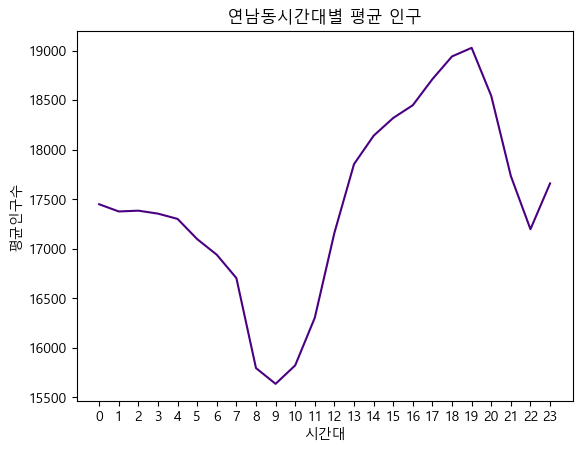

In [22]:
import matplotlib.pyplot as plt

plt.rc('font', family='malgun gothic')
plt.title(dong_name + '시간대별 평균 인구')
plt.plot(range(24), s, color='indigo')
plt.xticks(range(24))
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

#### 두 개 동 비교

첫번째 행정동을 입력하세요 --> 동교동
두번째 행정동을 입력하세요 --> 연남동


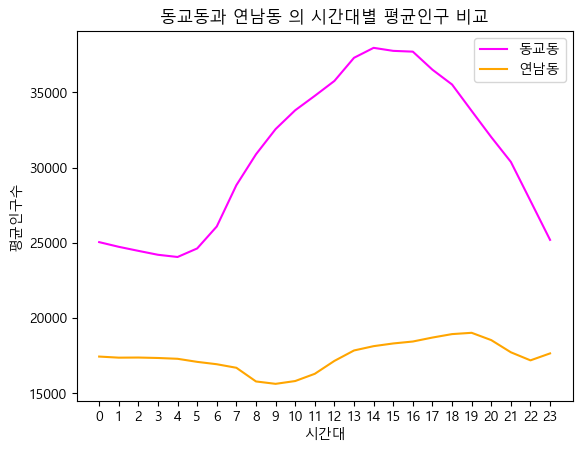

In [25]:
# 행정동-1
dong_name1 = input('첫번째 행정동을 입력하세요 --> ')
for row in code_data: 
    if row[-1] == dong_name1: 
        dong_code1 = int(row[1])

# 행정동-2
dong_name2 = input('두번째 행정동을 입력하세요 --> ')
for row in code_data: 
    if row[-1] == dong_name2: 
        dong_code2 = int(row[1])


s1 = [0 for i in range(24)]
s2 = [0 for i in range(24)]

for row in data: 
    # 행정동-1 인 경우
    if row[2] == dong_code1: 
        s1[row[1]] += row[3]

    # 행정동-2 인 경우
    elif row[2] == dong_code2: 
        s2[row[1]] += row[3]

s1 = [p/31 for p in s1]
s2 = [p/31 for p in s2]

plt.rc('font', family='Malgun Gothic')
plt.title(dong_name1 + '과 '+dong_name2+' 의 시간대별 평균인구 비교')
plt.plot(range(24), s1, color = 'magenta', label=dong_name1)
plt.plot(range(24), s2, color = 'orange', label =dong_name2)
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.show()